In [40]:
import numpy as np
import matplotlib.pyplot as plt
import random

## Data for toy experiment
We test this setup on the same setup as was used in this paper: 

(θ1, θ2) → (ya, yb) = (r1 cos θ1 + r2 cos(θ1 + θ2), r1 sin θ1 + r2 sin(θ1 + θ2)).

For the training set he used r1 = 2.0 and r2 = 1.3, random samples from a restricted range of
(θ1, θ2) were made, and Gaussian noise of magnitude 0.05 was added to the outputs.

In [13]:
def robot_arm(theta1, theta2):
    r1 = 2.0
    r2 = 1.3
    ya = r1*np.cos(theta1) + r2*np.cos(theta1 + theta2)
    yb = r1*np.sin(theta1) + r2*np.sin(theta1 + theta2)
    return ya, yb

Text(0, 0.5, 'a2')

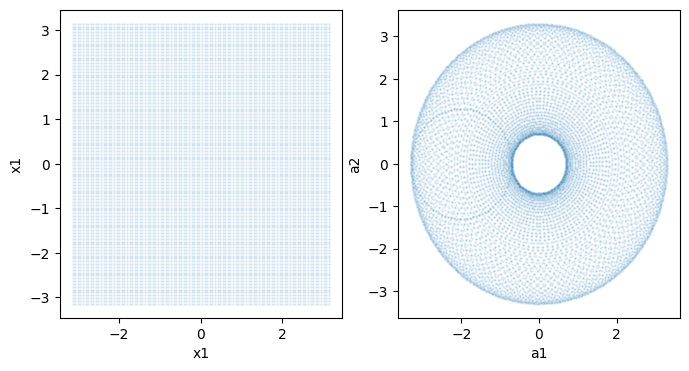

In [72]:
# Look at the mapping function
nx = 100
x1 = np.linspace(-np.pi, np.pi, nx)
x2 = np.linspace(-np.pi, np.pi, nx)

xx1, xx2 = np.meshgrid(x1, x2)

aa1, aa2 = robot_arm(xx1, xx2)

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (8, 4))

ax[0].scatter(xx1, xx2, s=1, alpha=0.1)
ax[0].set_xlabel("x1")
ax[0].set_ylabel("x1")
ax[1].scatter(aa1, aa2, s=1, alpha=0.1)
ax[1].set_xlabel("a1")
ax[1].set_ylabel("a2")

Text(0, 0.5, 'a2')

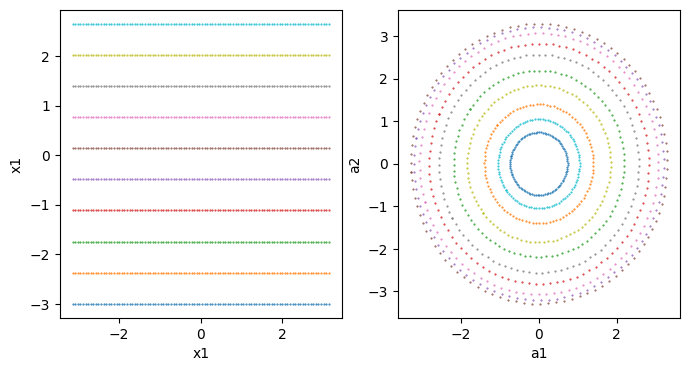

In [39]:
# Look at the mapping function
nx = 100
x1 = np.linspace(-np.pi, np.pi, nx)

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (8, 4))
lines = 10
for i in range(lines):
    dx2 = 2*np.pi/lines
    x2 = 0*x1 -3 + i*dx2
    a1, a2 = robot_arm(x1, x2)
    ax[0].plot(x1, x2, marker='.', markersize=1, linestyle='none')
    ax[1].plot(a1, a2, marker='.', markersize=1, linestyle='none')

ax[0].set_xlabel("x1")
ax[0].set_ylabel("x1")
ax[1].set_xlabel("a1")
ax[1].set_ylabel("a2")

Text(0, 0.5, 'a2')

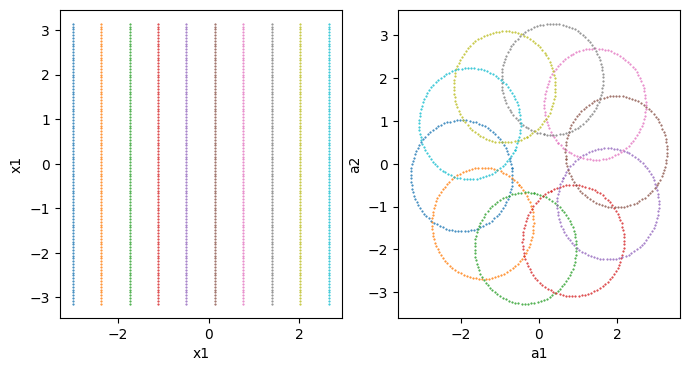

In [56]:
# Look at the mapping function
nx = 100
x2 = np.linspace(-np.pi, np.pi, nx)

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (8, 4))
lines = 10
for i in range(lines):
    dx1 = 2*np.pi/lines
    x1 = 0*x2 -3 + i*dx1
    a1, a2 = robot_arm(x1, x2)
    ax[0].plot(x1, x2, marker='.', markersize=1, linestyle='none')
    ax[1].plot(a1, a2, marker='.', markersize=1, linestyle='none')

ax[0].set_xlabel("x1")
ax[0].set_ylabel("x1")
ax[1].set_xlabel("a1")
ax[1].set_ylabel("a2")

Text(0, 0.5, 'a2')

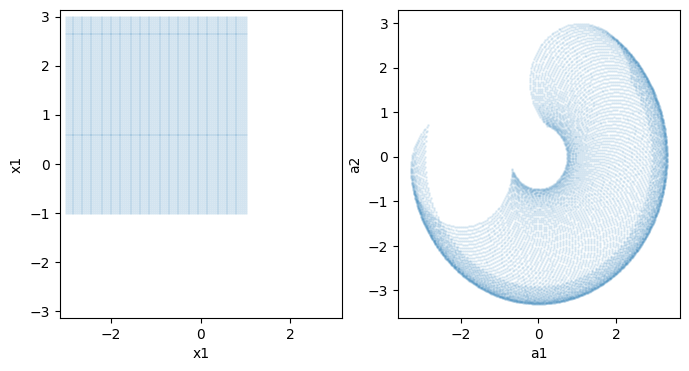

In [73]:
# Look at the mapping function
nx = 100
x1 = np.linspace(-3, 1, nx)
x2 = np.linspace(-1, 3, nx)

xx1, xx2 = np.meshgrid(x1, x2)

aa1, aa2 = robot_arm(xx1, xx2)

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (8, 4))

ax[0].scatter(xx1, xx2, s=1, alpha=0.1)
ax[0].set_xlabel("x1")
ax[0].set_ylabel("x1")
ax[0].set_xlim(-np.pi, np.pi)
ax[0].set_ylim(-np.pi, np.pi)
ax[1].scatter(aa1, aa2, s=1, alpha=0.1)
ax[1].set_xlabel("a1")
ax[1].set_ylabel("a2")

Text(0, 0.5, 'a2')

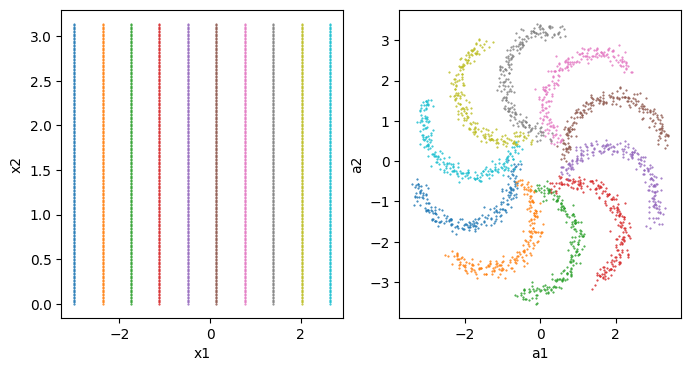

In [115]:
# Add noise
nx = 200
x2 = np.linspace(0, np.pi, nx)

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (8, 4))
lines = 10
for i in range(lines):
    dx1 = 2*np.pi/lines
    x1 = 0*x2 -3 + i*dx1
    a1, a2 = robot_arm(x1, x2)
    a1 = a1 + np.random.normal(0,0.1,len(a1))
    a2 = a2 + np.random.normal(0,0.1,len(a2))
    ax[0].plot(x1, x2, marker='.', markersize=1, linestyle='none')
    ax[1].plot(a1, a2, marker='.', markersize=1, linestyle='none')

ax[0].set_xlabel("x1")
ax[0].set_ylabel("x2")
ax[1].set_xlabel("a1")
ax[1].set_ylabel("a2")

(-3.141592653589793, 3.141592653589793)

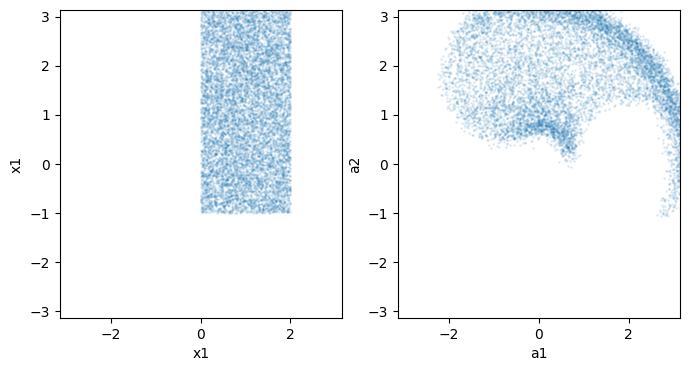

In [136]:

# Generate training data

# Randomly sample from a subset of x1, x2:
Nx = 10000
x1_min = 0
x1_max = 2
x2_min = -1
x2_max = np.pi
x1 = np.array([random.uniform(x1_min, x1_max) for i in range(Nx)])
x2 = np.array([random.uniform(x2_min, x2_max) for i in range(Nx)])

# Get robot arm value
a1, a2 = robot_arm(x1, x2)

# Add noise to the data

noise1 = np.random.normal(0,0.1,len(a1))
noise2 = np.random.normal(0,0.1,len(a1))
a1 = a1 + noise1
a2 = a2 + noise2

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (8, 4))
ax[0].scatter(x1, x2, s=1, alpha=0.1)
ax[0].set_xlabel("x1")
ax[0].set_ylabel("x1")
ax[0].set_xlim(-np.pi, np.pi)
ax[0].set_ylim(-np.pi, np.pi)
ax[1].scatter(a1, a2, s=1, alpha=0.1)
ax[1].set_xlabel("a1")
ax[1].set_ylabel("a2")
ax[1].set_xlim(-np.pi, np.pi)
ax[1].set_ylim(-np.pi, np.pi)


(-3.141592653589793, 3.141592653589793)

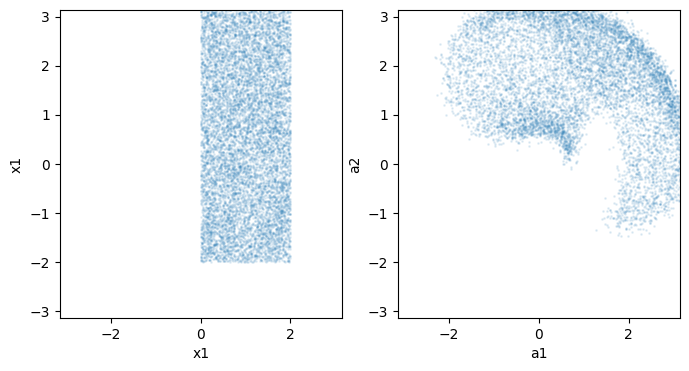

In [140]:

# Generate training data

# Randomly sample from a subset of x1, x2:
Nx = 10000
x1_min = 0
x1_max = 2
x2_min = -1
x2_max = np.pi
x1 = np.array([random.uniform(x1_min, x1_max) for i in range(Nx)])
x2 = np.array([random.uniform(x2_min, x2_max) for i in range(Nx)])

# Get robot arm value
a1, a2 = robot_arm(x1, x2)

# Add noise to the data

noise1 = np.random.normal(0,0.1,len(a1))
noise2 = np.random.normal(0,0.1,len(a1))
a1 = a1 + noise1
a2 = a2 + noise2

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (8, 4))
ax[0].scatter(x1, x2, s=1, alpha=0.1)
ax[0].set_xlabel("x1")
ax[0].set_ylabel("x1")
ax[0].set_xlim(-np.pi, np.pi)
ax[0].set_ylim(-np.pi, np.pi)
ax[1].scatter(a1, a2, s=1, alpha=0.1)
ax[1].set_xlabel("a1")
ax[1].set_ylabel("a2")
ax[1].set_xlim(-np.pi, np.pi)
ax[1].set_ylim(-np.pi, np.pi)
